<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Vizualization-tools-(the-.plot()-function)" data-toc-modified-id="Vizualization-tools-(the-.plot()-function)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Vizualization tools (the <code>.plot()</code> function)</a></span><ul class="toc-item"><li><span><a href="#Line-plots" data-toc-modified-id="Line-plots-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Line plots</a></span></li><li><span><a href="#Scatter-plots" data-toc-modified-id="Scatter-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Scatter plots</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Box-plots" data-toc-modified-id="Box-plots-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Box plots</a></span></li></ul></li><li><span><a href="#Single-variable-statistics" data-toc-modified-id="Single-variable-statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Single-variable statistics</a></span><ul class="toc-item"><li><span><a href="#The-.describe()-function" data-toc-modified-id="The-.describe()-function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The <code>.describe()</code> function</a></span></li><li><span><a href="#Calculating-individual-statistics" data-toc-modified-id="Calculating-individual-statistics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculating individual statistics</a></span><ul class="toc-item"><li><span><a href="#.mean()" data-toc-modified-id=".mean()-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span><code>.mean()</code></a></span></li><li><span><a href="#.var()" data-toc-modified-id=".var()-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span><code>.var()</code></a></span></li><li><span><a href="#.std()" data-toc-modified-id=".std()-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span><code>.std()</code></a></span></li><li><span><a href="#.median()" data-toc-modified-id=".median()-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span><code>.median()</code></a></span></li></ul></li><li><span><a href="#Calculating-row-level-statistics" data-toc-modified-id="Calculating-row-level-statistics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Calculating row-level statistics</a></span></li><li><span><a href="#Creating-your-own-list-of-summary-statistics-with-the-.agg()-function" data-toc-modified-id="Creating-your-own-list-of-summary-statistics-with-the-.agg()-function-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Creating your own list of summary statistics with the <code>.agg()</code> function</a></span></li></ul></li><li><span><a href="#Two-variable-statistics" data-toc-modified-id="Two-variable-statistics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Two-variable statistics</a></span><ul class="toc-item"><li><span><a href="#Covariance:-.cov()" data-toc-modified-id="Covariance:-.cov()-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Covariance: <code>.cov()</code></a></span></li><li><span><a href="#Correlation:-.corr()" data-toc-modified-id="Correlation:-.corr()-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Correlation: <code>.corr()</code></a></span></li><li><span><a href="#Autocorrelation:-.autocorr()" data-toc-modified-id="Autocorrelation:-.autocorr()-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Autocorrelation: <code>.autocorr()</code></a></span></li></ul></li><li><span><a href="#Rolling-statistics" data-toc-modified-id="Rolling-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rolling statistics</a></span><ul class="toc-item"><li><span><a href="#Fixed-window-rolling-statistics" data-toc-modified-id="Fixed-window-rolling-statistics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fixed-window rolling statistics</a></span></li><li><span><a href="#Expanding-window-rolling-statistics" data-toc-modified-id="Expanding-window-rolling-statistics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Expanding-window rolling statistics</a></span></li></ul></li></ul></div>

# Preliminaries

In [1]:
import pandas as pd
import pandas_datareader as pdr

In [2]:
# Download data on Fama-French three factors (we will use this data in all our examples)
ff3 = pdr.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                     '1970-01-01','2020-12-31'
                    )[0]/100
ff3

,Mkt-RF,SMB,HML,RF
Date,,,,
1970-01,-0.0810,0.0295,0.0312,0.0060
1970-02,0.0513,-0.0256,0.0393,0.0062
1970-03,-0.0106,-0.0230,0.0399,0.0057
1970-04,-0.1100,-0.0612,0.0617,0.0050
1970-05,-0.0692,-0.0456,0.0332,0.0053
...,...,...,...,...
2020-08,0.0763,-0.0022,-0.0293,0.0001
2020-09,-0.0363,-0.0004,-0.0266,0.0001
2020-10,-0.0210,0.0439,0.0419,0.0001


In [3]:
# Rename for convenience
ff3.rename(columns = {'Mkt-RF': 'MKT'}, inplace = True)
ff3.head(2)

,MKT,SMB,HML,RF
Date,,,,
1970-01,-0.0810,0.0295,0.0312,0.0060
1970-02,0.0513,-0.0256,0.0393,0.0062


# Vizualization tools (the ``.plot()`` function)

There are many different ways to visualize the data from a Pandas dataframe (e.g. the ``matplotlib`` and ``seaborn`` packages are very popular). However, for the purpose of this class, the ``.plot()`` function that comes with the Pandas package will be sufficient.

Below we work through some examples of the most common types of plots used for financial data: line plots, scatter plots, histograms, and box plots.

Abbreviated syntax:
```python
DataFrame.plot(kind = 'line', x = None, y = None, 
               title = None, xlabel = None, ylabel = None,
               legend = True, grid = False, layout = None, 
               sharex = True, sharey = False, figsize = None)
```

More detail on the ``.plot()`` function can be found here:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

## Line plots

Note that, by default, ``plot()`` creates a "line" plot, using the index of the dataframe for the x axis (in our case, the Date):

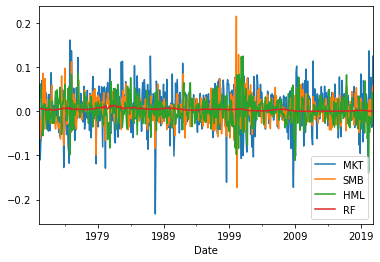

In [4]:
ff3.plot();

You can specify which variables you want plotted by subsetting the overall dataframe first:

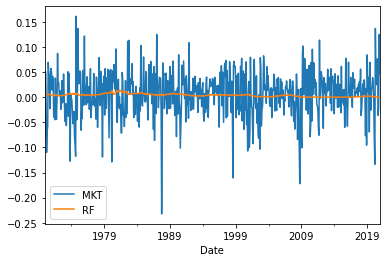

In [5]:
ff3[['MKT','RF']].plot();

Below, we show more of the functionality of ``.plot()`` through a more involved example:

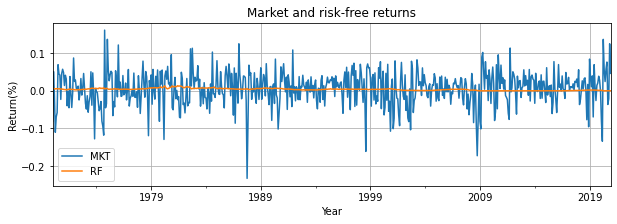

In [6]:
ff3[['MKT','RF']].plot(kind = 'line', 
                       title = 'Market and risk-free returns',
                       xlabel = 'Year', ylabel = 'Return(%)',
                       legend = True,
                       grid = True,
                      figsize = (10,3));

## Scatter plots
To create a scatter plot, we need to change the ``kind`` parameter to "scatter" and also specify what is on the x axis and what is on the y axis:

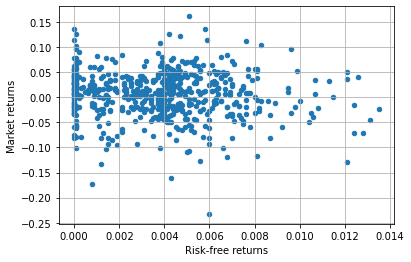

In [7]:
ff3.plot(x = 'RF', y = 'MKT', 
         kind = 'scatter', 
         xlabel = 'Risk-free returns', ylabel = 'Market returns',
         grid = True);

## Histograms
For a histogram, we use ``kind='hist'`` and then use ``subplots=True`` to specify that we want each variable to have its own histogram, in a separate subplot:

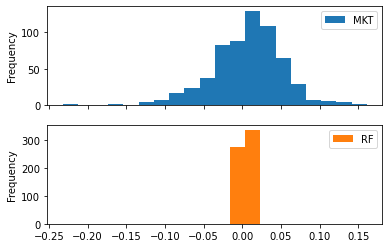

In [8]:
ff3[['MKT','RF']].plot(kind = 'hist', subplots = True, bins = 20);

We can change the position of the subplots relative to each other using the ``layout`` parameter:

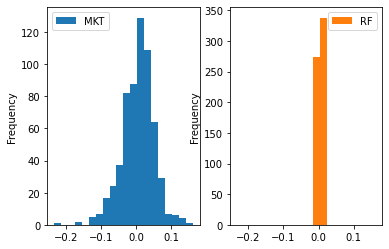

In [9]:
ff3[['MKT','RF']].plot(kind = 'hist', subplots = True, bins = 20, 
                       layout = (1,2));

We can create a continuous approximation of the histogram using ``kind='density'``:

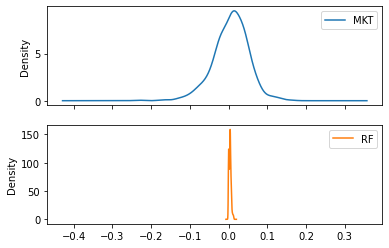

In [10]:
ff3[['MKT','RF']].plot(kind = 'density', subplots = True);

## Box plots

For box plots, we use ``kind='box'``:

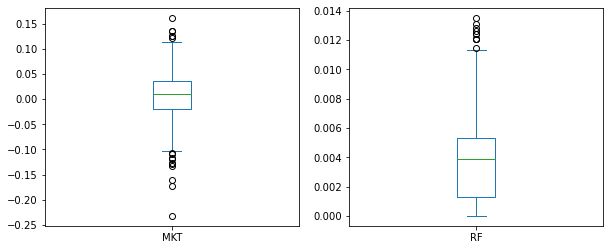

In [11]:
ff3[['MKT','RF']].plot(kind = 'box', subplots = True, 
                       figsize = (10,4), sharey = False);

# Single-variable statistics

We start by looking at statistics that describe a single variable (as opposed to the relationship between two variables). 

Since our data will almost always be in a Pandas dataframe, we will use pandas functions (attributes) to calculate sample statistics, but many other packages can be used to calculate summary statistics for your data (e.g. the ``numpy`` package allows you to calculate descriptive statistics if your data is in a Numpy array).

## The ``.describe()`` function

We can use the  ``.describe()`` function to get some standard descriptive statistics for the entire dataset. 

Syntax:
```python
DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
```

The default is for ``.describe()`` to produce summary statistics only for numerical data types in the dataframe. You can change this with the ``include`` and ``exclude`` parameters. 

In [12]:
ff3.describe()

,MKT,SMB,HML,RF
count,612.000000,612.000000,612.00000,612.000000
mean,0.005926,0.001404,0.00253,0.003723
std,0.045952,0.030765,0.02963,0.002801
min,-0.232400,-0.172900,-0.14020,0.000000
25%,-0.020200,-0.017400,-0.01435,0.001300
50%,0.010250,0.001150,0.00215,0.003900
75%,0.035775,0.018950,0.01735,0.005300
max,0.161000,0.214800,0.12480,0.013500


The ``percentiles`` parameter allows you to specify which percentiles you want ``.describe()`` to calculate (default is 25th, 50th and 75th percentiles). For example, below, we only ask for the 50th percentile (the median):

In [13]:
ff3[['SMB','HML']].describe(percentiles = [0.5])

,SMB,HML
count,612.000000,612.00000
mean,0.001404,0.00253
std,0.030765,0.02963
min,-0.172900,-0.14020
50%,0.001150,0.00215
max,0.214800,0.12480


## Calculating individual statistics

Each individual statistic produced by ``.describe()`` has its own function that can be applied either to the entire dataframe or to subsets of it. Below I only show examples for mean, variance, standard deviation and median (but you can also use ``.count()``, ``.min()``, ``.max()``, ``.sum()`` and many others).

### ``.mean()``

In [14]:
print('Means:') 
ff3.mean()

Means:


MKT    0.005926
SMB    0.001404
HML    0.002530
RF     0.003723
dtype: float64

### ``.var()``

In [15]:
print('Variances:')
ff3.var()

Variances:


MKT    0.002112
SMB    0.000946
HML    0.000878
RF     0.000008
dtype: float64

### ``.std()``

In [16]:
print('Standard deviations')
ff3.std()

Standard deviations


MKT    0.045952
SMB    0.030765
HML    0.029630
RF     0.002801
dtype: float64

### ``.median()``

In [17]:
print('Medians:')
ff3.median()

Medians:


MKT    0.01025
SMB    0.00115
HML    0.00215
RF     0.00390
dtype: float64

**Challenge:**

Note that the output of ``.describe()`` is also a dataframe. So we can use ``.loc[]`` to access specific numbers in that output table.

Use the space below to calculate and print the interquartile range (IQR = percentile 75 minus percentile 25) for the 'MKT' variable:

In [18]:
a = ff3.describe()
a

,MKT,SMB,HML,RF
count,612.000000,612.000000,612.00000,612.000000
mean,0.005926,0.001404,0.00253,0.003723
std,0.045952,0.030765,0.02963,0.002801
min,-0.232400,-0.172900,-0.14020,0.000000
25%,-0.020200,-0.017400,-0.01435,0.001300
50%,0.010250,0.001150,0.00215,0.003900
75%,0.035775,0.018950,0.01735,0.005300
max,0.161000,0.214800,0.12480,0.013500


In [19]:
a.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [20]:
print(a.loc['75%','MKT'] - a.loc['25%','MKT'])

0.055975


## Calculating row-level statistics

All statistical functions in Pandas (e.g. ``.mean()``, ``.median()``, etc) have an ``axis`` argument that allows you to specify if you want that statistic to be calculated column-wise (axis=0, the default) or row-wise (axis=1). 

For example, if we want to know, each month, which of the columns in ``ff3`` had the highest return, we would use:

In [21]:
ff3.max(axis = 1)

Date
1970-01    0.0312
1970-02    0.0513
1970-03    0.0399
1970-04    0.0617
1970-05    0.0332
            ...  
2020-08    0.0763
2020-09    0.0001
2020-10    0.0439
2020-11    0.1247
2020-12    0.0483
Freq: M, Length: 612, dtype: float64

In [22]:
ff3.head(2) #quick check if the above worked

,MKT,SMB,HML,RF
Date,,,,
1970-01,-0.0810,0.0295,0.0312,0.0060
1970-02,0.0513,-0.0256,0.0393,0.0062


As usual, we can also calculate row-wise statistics using only a subset of the columns:

In [23]:
ff3[['SMB','HML']].max(axis=1)

Date
1970-01    0.0312
1970-02    0.0393
1970-03    0.0399
1970-04    0.0617
1970-05    0.0332
            ...  
2020-08   -0.0022
2020-09   -0.0004
2020-10    0.0439
2020-11    0.0574
2020-12    0.0483
Freq: M, Length: 612, dtype: float64

## Creating your own list of summary statistics with the ``.agg()`` function

If we want a different selection of summary statistics than the one offered by the ``.describe()`` function, we can use the ``.agg()`` function to specify exactly which statistics we want:

Syntax:
```python
DataFrame.agg(func=None, axis=0, *args, **kwargs)
```

If you want the same stats for all variables, just provide a list of the names of the functions you want to be used (e.g. use 'mean' for the ``.mean()`` function, 'std' for the ``.std()`` function etc.).

In [24]:
ff3.agg(func = ['mean','std','median','sum'])

,MKT,SMB,HML,RF
mean,0.005926,0.001404,0.00253,0.003723
std,0.045952,0.030765,0.02963,0.002801
median,0.010250,0.001150,0.00215,0.003900
sum,3.626600,0.859400,1.54860,2.278300


You can also specify different functions (stats) for each variable:

In [25]:
ff3.agg(func = {'MKT':['mean','median'], 'SMB':['mean','std']})

,MKT,SMB
mean,0.005926,0.001404
median,0.010250,NaN
std,NaN,0.030765


**Challenge:**

Create a table that shows just the mean and standard deviation for the SMB and HML variables

In [26]:
ff3[['SMB','HML']].agg(['mean','std'])

,SMB,HML
mean,0.001404,0.00253
std,0.030765,0.02963


# Two-variable statistics

These are statistics that describe the relation between two variables. The most commonly used ones are the **covariance* and the **correlation**. Both of these try to quantify the strength of the **linear** relation between the two variables. The main difference between them is that the correlation coefficient is bounded between -1 and 1 and so it is easier to interpret. 

*If two variables are tightly related to each other, but not in a linear fashion (e.g. $Y = X^4$), the covariance and correlation will **underestimate** the strength of that relation.*

## Covariance: ``.cov()``

The ``cov()`` function produces a covariance matrix for the variables (columns) in the dataframe. The numbers on the diagonal are actually variances. Each number on the off-diagonal is the covariance between the two variables specified in the column/row headers.

In [27]:
ff3.cov()

,MKT,SMB,HML,RF
MKT,0.002112,0.000405,-0.000308,-0.000011
SMB,0.000405,0.000946,-0.000163,-0.000004
HML,-0.000308,-0.000163,0.000878,0.000009
RF,-0.000011,-0.000004,0.000009,0.000008


The output table above is a dataframe, so we can access individual numbers in it using the ``.loc[]`` operator. 

For example, below, we extract the covariance between the 'MKT' and 'SMB' variables:

In [28]:
ff3.cov().loc['MKT', 'SMB']

0.0004047944073253961

Remember, if you want to use these estimates later on, you need to store them as new variables:

In [29]:
covmat = ff3.cov()
covmat

,MKT,SMB,HML,RF
MKT,0.002112,0.000405,-0.000308,-0.000011
SMB,0.000405,0.000946,-0.000163,-0.000004
HML,-0.000308,-0.000163,0.000878,0.000009
RF,-0.000011,-0.000004,0.000009,0.000008


In [30]:
cov_mkt_smb = covmat.loc['MKT', 'SMB']
cov_mkt_smb

0.0004047944073253961

## Correlation: ``.corr()``

Just like with covariance, we can calculate a correlation matrix for the entire dataset:

In [31]:
ff3.corr()

,MKT,SMB,HML,RF
MKT,1.000000,0.286331,-0.225911,-0.089092
SMB,0.286331,1.000000,-0.178917,-0.044725
HML,-0.225911,-0.178917,1.000000,0.108959
RF,-0.089092,-0.044725,0.108959,1.000000


Or we can extract the correlation of a particular pair of variables in your dataset:

In [32]:
ff3.corr().loc['MKT', 'SMB']

0.2863310434640219

**Challenge:**

Calculate the correlation between 'MKT' returns in the current month and the SMB return from 12 months ago.

In [33]:
smb = ff3['SMB'].to_frame()
smb['smb_lag12'] = smb['SMB'].shift(12)
smb.corr()

,SMB,smb_lag12
SMB,1.000000,0.094283
smb_lag12,0.094283,1.000000


## Autocorrelation: ``.autocorr()``

The autocorrelation of a variable is the correlation between its current value and a value from the past. So there is not one single autocorrelation for any given variable, there is one autocorrelation for every "lag" between the current value and the value from the past. For example, below, we calculate the "1-month autocorrelation" and "12-month autocorrelation" for the market portfolio returns:

In [34]:
mkt_acor1 = ff3['MKT'].autocorr(lag = 1) 
print("1-month autocorrelation of market returns:", mkt_acor1)

1-month autocorrelation of market returns: 0.06457337999767149


In [35]:
mkt_acor12 = ff3['MKT'].autocorr(lag = 12) 
print("12-month autocorrelation of market returns:", mkt_acor12)

12-month autocorrelation of market returns: 0.02828759092532415


And below we verify that the autocorrelation is nothing but the correlation between the current value and a lagged value:

In [36]:
ff3['mkt_lag1'] = ff3['MKT'].shift(1)
ff3.head()

,MKT,SMB,HML,RF,mkt_lag1
Date,,,,,
1970-01,-0.0810,0.0295,0.0312,0.0060,NaN
1970-02,0.0513,-0.0256,0.0393,0.0062,-0.0810
1970-03,-0.0106,-0.0230,0.0399,0.0057,0.0513
1970-04,-0.1100,-0.0612,0.0617,0.0050,-0.0106
1970-05,-0.0692,-0.0456,0.0332,0.0053,-0.1100


In [37]:
ff3[['MKT','mkt_lag1']].corr()

,MKT,mkt_lag1
MKT,1.000000,0.064573
mkt_lag1,0.064573,1.000000


# Rolling statistics

These are statistics that are re-calculated at each point in time, using either 
- a fixed number of data points from the past 
    - these are called "fixed window" rolling statistics
    - can be calculated with the "rolling" Pandas function
- all the data from the past (expanding window) 
    - these are called "expanding window" rolling statistics
    - can be calculated with the "expanding" Pandas function

Both the "expanding" and the "rolling" functions should be followed by the name of the statistic that you want to calculate.

## Fixed-window rolling statistics 

We use the ``.rolling()`` function to calculate summary statistics at each point in time "t" using only the observations from "t - w" to "t", where "w" is referred to as the "window" length.

Syntax:
```python
DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')
```

As an example, below, we calculate 60-month rolling means (i.e. "w" is 60) for all the variables in ``ff3``:

In [38]:
rolling_means = ff3.rolling(60).mean()
rolling_means

,MKT,SMB,HML,RF,mkt_lag1
Date,,,,,
1970-01,NaN,NaN,NaN,NaN,NaN
1970-02,NaN,NaN,NaN,NaN,NaN
1970-03,NaN,NaN,NaN,NaN,NaN
1970-04,NaN,NaN,NaN,NaN,NaN
1970-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-08,0.011497,-0.001702,-0.008360,0.000888,0.009218
2020-09,0.011403,-0.001270,-0.008900,0.000890,0.011497
2020-10,0.009762,-0.000227,-0.008127,0.000892,0.011403


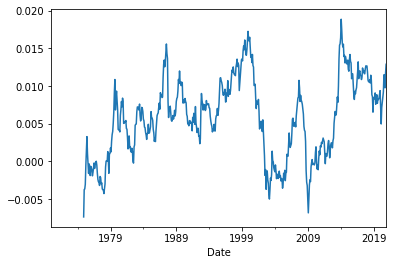

In [39]:
rolling_means['MKT'].plot();

We can calculate rolling versions for all summary statistics that the pandas package knows how to calculate. For example, below, we calculate the rolling, 36-month standard deviations of market returns, and we plot these over time:

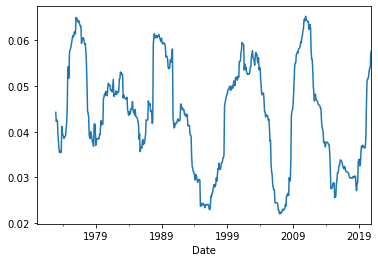

In [40]:
ff3['MKT'].rolling(36).std().plot();

We can even calculate rolling versions of two-variable summary statistics (like correlation and covariance). However, we have to remember that ``.corr()`` and ``.cov()`` produce matrices not single numbers. So if we want rolling correlations between, say, market returns and the risk-free rate, the cell below will produce a correlation matrix at each point in time:

In [41]:
not_like_this = ff3[['MKT','RF']].rolling(60).corr()
not_like_this

MKT        RF
Date                           
1970-01 MKT       NaN       NaN
        RF        NaN       NaN
1970-02 MKT       NaN       NaN
        RF        NaN       NaN
1970-03 MKT       NaN       NaN
...               ...       ...
2020-10 RF  -0.171608  1.000000
2020-11 MKT  1.000000 -0.212314
        RF  -0.212314  1.000000
2020-12 MKT  1.000000 -0.240182
        RF  -0.240182  1.000000

[1224 rows x 2 columns]

Instead, we need to supply one of the variables as a parameter to the ``.corr()`` function:

In [42]:
just_the_coeff = ff3['MKT'].rolling(60).corr(ff3['RF'])
just_the_coeff

Date
1970-01         NaN
1970-02         NaN
1970-03         NaN
1970-04         NaN
1970-05         NaN
             ...   
2020-08   -0.213687
2020-09   -0.213742
2020-10   -0.171608
2020-11   -0.212314
2020-12   -0.240182
Freq: M, Length: 612, dtype: float64

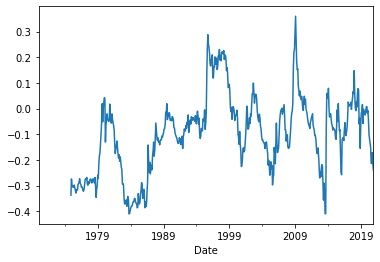

In [43]:
just_the_coeff.plot();

## Expanding-window rolling statistics

With expanding-window summary statistics, at each point in time, we use all the available data up to that point to calculate the statistic. We use the ``.expanding()`` function for this purpose, which also gives us the option to specify that we want to calculate the statistic only if we have a minimum number of observations available at that point (see the ``min_period`` parameter below): 

Syntax:
```python
DataFrame.expanding(min_periods=1, center=None, axis=0, method='single')
```

Note that, if we don't supply a large enough ``min_periods``, in the beginning of the sample, the statistics will be calculated using a very low number of observations (starting with 1), so they will be quite volatile:

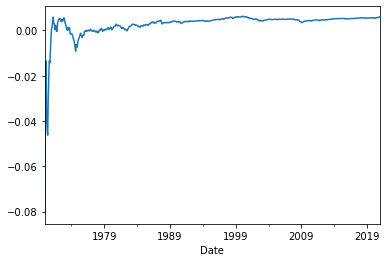

In [44]:
ff3['MKT'].expanding().mean().plot();

This looks a lot more stable if we make sure each statistic is calculated using at least 36 observations:

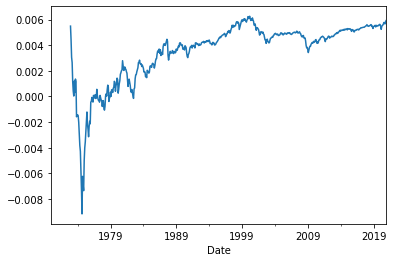

In [45]:
ff3['MKT'].expanding(min_periods = 36).mean().plot();

As another example, let's look at the behavior of market volatility over time:

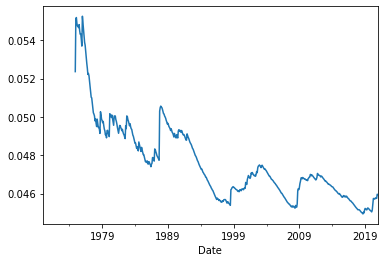

In [46]:
ff3['MKT'].expanding(min_periods = 60).std().plot();

Finally, below, we see that the correlation between market returns and tbill yields, while changing over time, is negative throughout (when we do not restrict ourselves to just the prior 60 observations):

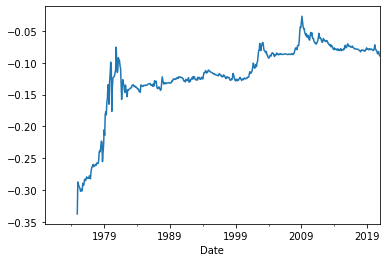

In [47]:
ff3['MKT'].expanding(min_periods = 60).corr(ff3['RF']).plot();